<a href="https://colab.research.google.com/github/krutikov-roman/AI-Bike-Sharing-Dataset-Research-Project/blob/main/Roman_Krutikov_AI_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Project using PyCaret on the Bike Sharing Dataset
By: Roman Krutikov

### Initial Downloading of the Dataset and Pip Installs



```

Only needs to be run once per runtime/session!

|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
```



In [ ]:
# https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
# Creator of Dataset: Hadi Fanaee-T

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

In [ ]:
# Installing an older version of pycaret because newest version (3.2.0) has issues with displaying some plots
!pip install pycaret==3.1.0
!pip install pycaret[analysis,models]==3.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 86.4 MB/s eta



```
^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^   ^
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |


Only needs to be run once per runtime/session!


```



### Importing, Transforming, Modelling and Predition

In [ ]:
import pandas as pd

# Initial Dataframe
bikes_df = pd.read_csv('hour.csv')
bikes_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
# Removing columns that are not needed

columns_not_needed = ['instant', 'dteday', 'casual', 'registered']
for column in columns_not_needed:
  bikes_df = bikes_df.drop(column, axis=1)

bikes_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
# One-Hot Encoding categorical columns

columns_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns_categorical:
  one_hot = pd.get_dummies(bikes_df[column])
  one_hot = one_hot.add_suffix(f"_{column}")
  bikes_df = bikes_df.drop(column, axis=1)
  bikes_df = bikes_df.join(one_hot)

bikes_df

,temp,atemp,hum,windspeed,cnt,1_season,2_season,3_season,4_season,0_yr,...,3_weekday,4_weekday,5_weekday,6_weekday,0_workingday,1_workingday,1_weathersit,2_weathersit,3_weathersit,4_weathersit
0,0.24,0.2879,0.81,0.0000,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0000,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0000,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0000,13,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,119,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
17375,0.26,0.2576,0.60,0.1642,89,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
17376,0.26,0.2576,0.60,0.1642,90,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
17377,0.26,0.2727,0.56,0.1343,61,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
my_session_id = 20231201
target_column = 'cnt'
import pycaret
from pycaret.regression import *

# Not using categorical_features parameter as with bike data, some columns are
# incorrectly identified as ordinal features, so manual one-hot encoding was done
# earlier
s = setup(bikes_df, target = target_column, session_id = my_session_id)

,Description,Value
0,Session id,20231201
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 62)"
4,Transformed data shape,"(17379, 62)"
5,Transformed train set shape,"(12165, 62)"
6,Transformed test set shape,"(5214, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.1192,1884.6253,43.3747,0.9427,0.5118,0.5888,4.2780
lightgbm,Light Gradient Boosting Machine,31.5241,2248.3149,47.3771,0.9316,0.5347,0.6289,0.4150
et,Extra Trees Regressor,28.4791,2266.2117,47.5293,0.9312,0.3895,0.3813,8.4880
xgboost,Extreme Gradient Boosting,31.3227,2307.6885,47.9980,0.9298,0.5546,0.6504,0.3000
rf,Random Forest Regressor,32.6928,2681.2931,51.7444,0.9185,0.4757,0.5514,8.5050
dt,Decision Tree Regressor,43.5065,5398.2183,73.4002,0.8356,0.5619,0.5560,0.1380
gbr,Gradient Boosting Regressor,60.2169,6966.0989,83.4225,0.7884,0.8086,1.4723,1.6400
lr,Linear Regression,75.5061,10384.0416,101.8723,0.6845,1.0260,2.8801,0.0580
ridge,Ridge Regression,75.5073,10384.1988,101.8731,0.6845,1.0260,2.8694,0.0390
br,Bayesian Ridge,75.5036,10383.8630,101.8714,0.6845,1.0258,2.8676,0.1290


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

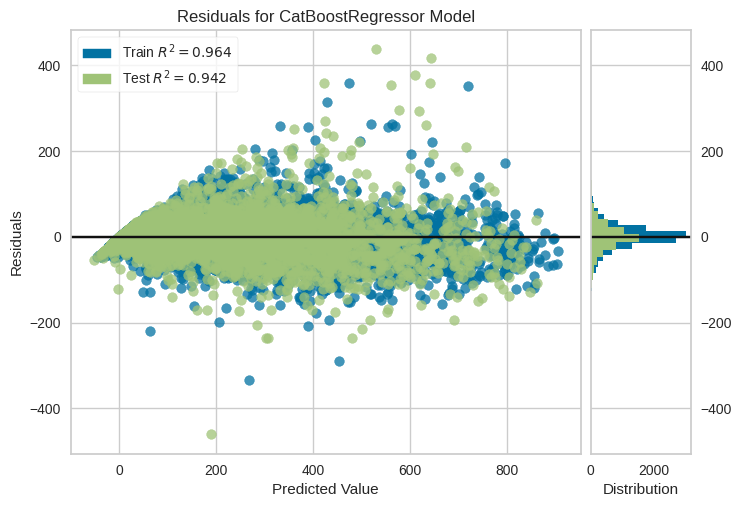

In [ ]:
# Plotting Residual
plot_model(best_model, plot = 'residuals')

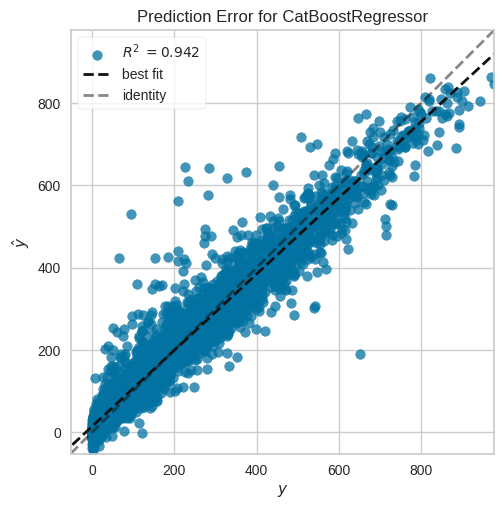

In [ ]:
# Plotting Errors
plot_model(best_model, plot = 'error')

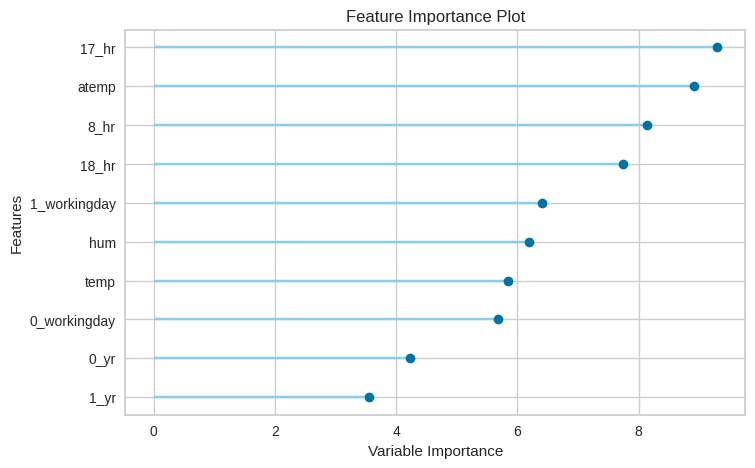

In [ ]:
# Plotting Feature Importance
plot_model(best_model, plot = 'feature')

In [ ]:
# Predict on the Test Set
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,27.6623,1885.6705,43.4243,0.9423,0.5021,0.5755


In [ ]:
# Showing predictions of the Bikes Dataframe
holdout_pred.head()

,temp,atemp,hum,windspeed,1_season,2_season,3_season,4_season,0_yr,1_yr,...,5_weekday,6_weekday,0_workingday,1_workingday,1_weathersit,2_weathersit,3_weathersit,4_weathersit,cnt,prediction_label
3950,0.74,0.6970,0.66,0.0896,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,420,341.144572
14401,0.66,0.5909,0.89,0.1045,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,147,144.625365
8570,0.22,0.2273,0.44,0.1343,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,70,58.319746
17290,0.22,0.2273,0.64,0.1642,1,0,0,0,0,1,...,1,0,0,1,1,0,0,0,112,198.376709
7307,0.26,0.3030,0.81,0.0000,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,29,42.815357


### Extra Predictions and Procedures

In [ ]:
# Dropping the target column to get the dataframe ready for predictions of the labels on an unseen dataset
bikes_prediction_df = bikes_df.copy()
bikes_prediction_df.drop(target_column, axis=1, inplace=True)
bikes_prediction_df.head()

,temp,atemp,hum,windspeed,1_season,2_season,3_season,4_season,0_yr,1_yr,...,3_weekday,4_weekday,5_weekday,6_weekday,0_workingday,1_workingday,1_weathersit,2_weathersit,3_weathersit,4_weathersit
0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [ ]:
# Running the prediction on the labels on an unseen dataset
predictions = predict_model(best_model, data = bikes_prediction_df)
predictions.head()

,temp,atemp,hum,windspeed,1_season,2_season,3_season,4_season,0_yr,1_yr,...,4_weekday,5_weekday,6_weekday,0_workingday,1_workingday,1_weathersit,2_weathersit,3_weathersit,4_weathersit,prediction_label
0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,34.843202
1,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,26.567674
2,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,21.090260
3,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,5.027052
4,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,-1.490012


In [ ]:
# Saving the model's pipeline
save_model(best_model, 'bike_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'atemp', 'hum',
                                              'windspeed', '1_season',
                                              '2_season', '3_season', '4_season',
                                              '0_yr', '1_yr', '1_mnth', '2_mnth',
                                              '3_mnth', '4_mnth', '5_mnth',
                                              '6_mnth', '7_mnth', '8_mnth',
                                              '9_mnth', '10_mnth', '11_mnth',
                                              '12_mnth', '0_hr', '1_hr', '2_hr',
                                              '3_hr', '4_hr', '5_hr', '6_hr',
                                              '7_hr', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
         

In [ ]:
# Loading the model's pipeline
loaded_best_pipeline = load_model('bike_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'atemp', 'hum',
                                             'windspeed', '1_season',
                                             '2_season', '3_season', '4_season',
                                             '0_yr', '1_yr', '1_mnth', '2_mnth',
                                             '3_mnth', '4_mnth', '5_mnth',
                                             '6_mnth', '7_mnth', '8_mnth',
                                             '9_mnth', '10_mnth', '11_mnth',
                                             '12_mnth', '0_hr', '1_hr', '2_hr',
                                             '3_hr', '4_hr', '5_hr', '6_hr',
                                             '7_hr', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7b073d6160e0>)])